In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:

datos_matriculas = pd.read_csv("datos_de_matriculas.csv",encoding='latin1', delimiter=';', low_memory= False)


FileNotFoundError: [Errno 2] No such file or directory: 'datos_de_matriculas.csv'

In [226]:
datos_matriculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248173 entries, 0 to 248172
Data columns (total 59 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   AÑO                                   248173 non-null  object 
 1   TOTAL MATRICULADOS                    248173 non-null  int64  
 2   MATRICULADOS MUJERES POR PROGRAMA     229243 non-null  float64
 3   MATRICULADOS HOMBRES POR PROGRAMA     228630 non-null  float64
 4   MATRICULADOS NO BINARIO POR CARRERA   16 non-null      float64
 5   TOTAL MATRICULADOS PRIMER AÑO         172885 non-null  float64
 6   MATRICULADOS MUJERES PRIMER AÑO       159894 non-null  float64
 7   MATRICULADOS HOMBRES PRIMER AÑO       159417 non-null  float64
 8   MATRICULADOS NO BINARIO PRIMER AÑO    6 non-null       float64
 9   CLASIFICACIÓN INSTITUCIÓN NIVEL 1     248173 non-null  object 
 10  CLASIFICACIÓN INSTITUCIÓN NIVEL 2     248173 non-null  object 
 11  

In [227]:
datos_matriculas.columns

Index(['AÑO', 'TOTAL MATRICULADOS', 'MATRICULADOS MUJERES POR PROGRAMA',
       'MATRICULADOS HOMBRES POR PROGRAMA',
       'MATRICULADOS NO BINARIO POR CARRERA', 'TOTAL MATRICULADOS PRIMER AÑO',
       'MATRICULADOS MUJERES PRIMER AÑO', 'MATRICULADOS HOMBRES PRIMER AÑO',
       'MATRICULADOS NO BINARIO PRIMER AÑO',
       'CLASIFICACIÓN INSTITUCIÓN NIVEL 1',
       'CLASIFICACIÓN INSTITUCIÓN NIVEL 2',
       'CLASIFICACIÓN INSTITUCIÓN NIVEL 3', 'CÓDIGO DE INSTITUCIÓN',
       'NOMBRE INSTITUCIÓN', 'ACREDITACIÓN INSTITUCIONAL', 'REGIÓN',
       'PROVINCIA', 'COMUNA', 'NOMBRE SEDE', 'NOMBRE CARRERA',
       'ÁREA DEL CONOCIMIENTO', 'CINE-F 1997 ÁREA', 'CINE-F 1997 SUBAREA',
       'ÁREA CARRERA GENÉRICA', 'CINE-F 2013 ÁREA', 'CINE-F 2013 SUBAREA',
       'NIVEL GLOBAL', 'CARRERA CLASIFICACIÓN NIVEL 1',
       'CARRERA CLASIFICACIÓN NIVEL 2', 'MODALIDAD', 'JORNADA',
       'TIPO DE PLAN DE LA CARRERA', 'DURACIÓN ESTUDIO CARRERA',
       'DURACIÓN TOTAL DE CARRERA', 'CÓDIGO CARRERA', 'ACR

In [228]:
columnas = [
    "AÑO" , "TOTAL MATRICULADOS" ,"MATRICULADOS MUJERES POR PROGRAMA","MATRICULADOS HOMBRES POR PROGRAMA",
    "TOTAL MATRICULADOS PRIMER AÑO","MATRICULADOS MUJERES PRIMER AÑO" ,"MATRICULADOS HOMBRES PRIMER AÑO" ,
    "REGIÓN" , "PROVINCIA" ,"COMUNA" , "NOMBRE CARRERA" ,"ÁREA DEL CONOCIMIENTO","ÁREA CARRERA GENÉRICA" 
]

datos_filtrados = datos_matriculas[columnas]


In [229]:
datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248173 entries, 0 to 248172
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AÑO                                248173 non-null  object 
 1   TOTAL MATRICULADOS                 248173 non-null  int64  
 2   MATRICULADOS MUJERES POR PROGRAMA  229243 non-null  float64
 3   MATRICULADOS HOMBRES POR PROGRAMA  228630 non-null  float64
 4   TOTAL MATRICULADOS PRIMER AÑO      172885 non-null  float64
 5   MATRICULADOS MUJERES PRIMER AÑO    159894 non-null  float64
 6   MATRICULADOS HOMBRES PRIMER AÑO    159417 non-null  float64
 7   REGIÓN                             248173 non-null  object 
 8   PROVINCIA                          248173 non-null  object 
 9   COMUNA                             248173 non-null  object 
 10  NOMBRE CARRERA                     248173 non-null  object 
 11  ÁREA DEL CONOCIMIENTO              2481

In [230]:
nulos_col = []
for col in columnas:
    nulos = datos_filtrados[col].isna().sum()
    if nulos != 0:
        nulos_col.append(col)
    print('-------------------')
    print(f'La columna {col} posee {nulos} nulos')

-------------------
La columna AÑO posee 0 nulos
-------------------
La columna TOTAL MATRICULADOS posee 0 nulos
-------------------
La columna MATRICULADOS MUJERES POR PROGRAMA posee 18930 nulos
-------------------
La columna MATRICULADOS HOMBRES POR PROGRAMA posee 19543 nulos
-------------------
La columna TOTAL MATRICULADOS PRIMER AÑO posee 75288 nulos
-------------------
La columna MATRICULADOS MUJERES PRIMER AÑO posee 88279 nulos
-------------------
La columna MATRICULADOS HOMBRES PRIMER AÑO posee 88756 nulos
-------------------
La columna REGIÓN posee 0 nulos
-------------------
La columna PROVINCIA posee 0 nulos
-------------------
La columna COMUNA posee 0 nulos
-------------------
La columna NOMBRE CARRERA posee 0 nulos
-------------------
La columna ÁREA DEL CONOCIMIENTO posee 0 nulos
-------------------
La columna ÁREA CARRERA GENÉRICA posee 0 nulos


In [231]:
nulos_col

['MATRICULADOS MUJERES POR PROGRAMA',
 'MATRICULADOS HOMBRES POR PROGRAMA',
 'TOTAL MATRICULADOS PRIMER AÑO',
 'MATRICULADOS MUJERES PRIMER AÑO',
 'MATRICULADOS HOMBRES PRIMER AÑO']

In [232]:
for columna in nulos_col:
    datos = datos_filtrados[columna].unique()
    print("-----------------------------------------")
    print(columna)
    print(datos)
    print("-----------------------------------------")


-----------------------------------------
MATRICULADOS MUJERES POR PROGRAMA
[2.400e+01 3.460e+02 6.500e+01 5.670e+02 7.000e+00 5.000e+00 6.000e+00
 5.300e+01 9.000e+00       nan 4.200e+01 5.900e+01 8.800e+01 9.400e+01
 1.200e+01 3.000e+00 1.400e+01 2.100e+01 6.700e+01 1.800e+01 8.000e+00
 2.600e+01 4.500e+01 4.000e+00 1.500e+01 1.000e+01 2.000e+01 2.900e+01
 1.160e+02 2.000e+00 2.700e+01 3.000e+01 3.100e+01 7.300e+01 1.000e+00
 2.300e+01 4.400e+01 1.100e+01 7.700e+01 1.470e+02 9.600e+01 4.270e+02
 1.750e+02 1.150e+02 2.570e+02 9.300e+01 1.760e+02 2.780e+02 4.390e+02
 7.000e+01 3.200e+01 4.100e+01 1.290e+02 6.300e+01 8.000e+01 2.200e+01
 4.000e+01 2.410e+02 3.400e+01 1.100e+02 5.340e+02 1.310e+02 4.420e+02
 2.630e+02 6.100e+01 3.700e+01 2.200e+02 2.800e+01 1.250e+02 2.870e+02
 1.730e+02 3.300e+01 4.190e+02 5.000e+01 1.580e+02 3.600e+01 7.810e+02
 2.760e+02 5.700e+01 1.700e+01 2.300e+02 1.070e+02 7.870e+02 1.900e+01
 1.600e+01 1.300e+01 3.900e+01 5.750e+02 2.590e+02 2.330e+02 2.180e+02
 

In [233]:
datos_filtrados.replace(np.nan, 0, inplace = True)


C:\Users\crist\AppData\Local\Temp\ipykernel_22804\1042278761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados.replace(np.nan, 0, inplace = True)


In [234]:
datos_filtrados

,AÑO,TOTAL MATRICULADOS,MATRICULADOS MUJERES POR PROGRAMA,MATRICULADOS HOMBRES POR PROGRAMA,TOTAL MATRICULADOS PRIMER AÑO,MATRICULADOS MUJERES PRIMER AÑO,MATRICULADOS HOMBRES PRIMER AÑO,REGIÓN,PROVINCIA,COMUNA,NOMBRE CARRERA,ÁREA DEL CONOCIMIENTO,ÁREA CARRERA GENÉRICA
0,MAT_2024,77,24.0,53.0,7.0,2.0,5.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,LICENCIATURA EN HISTORIA,Ciencias Sociales,Historia
1,MAT_2024,550,346.0,204.0,215.0,134.0,81.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,PSICOLOGIA,Ciencias Sociales,Psicología
2,MAT_2024,82,65.0,17.0,0.0,0.0,0.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,PSICOLOGIA,Ciencias Sociales,Psicología
3,MAT_2024,704,567.0,137.0,0.0,0.0,0.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,PSICOLOGIA,Ciencias Sociales,Psicología
4,MAT_2024,7,7.0,0.0,0.0,0.0,0.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,ENFERMERIA,Salud,Enfermería
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248168,MAT_2007,35,29.0,6.0,35.0,29.0,6.0,Región Metropolitana,SANTIAGO,SANTIAGO,ADMINISTRACION MENCION GESTION COMERCIAL O COM...,Administración y Comercio,Técnico en Administración de Empresas
248169,MAT_2007,102,81.0,21.0,102.0,81.0,21.0,Región Metropolitana,SANTIAGO,SANTIAGO,ADMINISTRACION MENCION GESTION COMERCIAL O COM...,Administración y Comercio,Técnico en Administración de Empresas
248170,MAT_2007,225,216.0,9.0,225.0,216.0,9.0,Región Metropolitana,SANTIAGO,SANTIAGO,ASISTENTE EJECUTIVO BILINGÜE,Administración y Comercio,Secretariado Bilingüe
248171,MAT_2007,217,207.0,10.0,217.0,207.0,10.0,Región Metropolitana,SANTIAGO,SANTIAGO,ASISTENTE EJECUTIVO BILINGÜE,Administración y Comercio,Secretariado Bilingüe


In [235]:

nulos_col = []
for col in columnas:
    nulos = datos_filtrados[col].isna().sum()
    if nulos != 0:
        nulos_col.append(col)
    print('-------------------')
    print(f'La columna {col} posee {nulos} nulos')


-------------------
La columna AÑO posee 0 nulos
-------------------
La columna TOTAL MATRICULADOS posee 0 nulos
-------------------
La columna MATRICULADOS MUJERES POR PROGRAMA posee 0 nulos
-------------------
La columna MATRICULADOS HOMBRES POR PROGRAMA posee 0 nulos
-------------------
La columna TOTAL MATRICULADOS PRIMER AÑO posee 0 nulos
-------------------
La columna MATRICULADOS MUJERES PRIMER AÑO posee 0 nulos
-------------------
La columna MATRICULADOS HOMBRES PRIMER AÑO posee 0 nulos
-------------------
La columna REGIÓN posee 0 nulos
-------------------
La columna PROVINCIA posee 0 nulos
-------------------
La columna COMUNA posee 0 nulos
-------------------
La columna NOMBRE CARRERA posee 0 nulos
-------------------
La columna ÁREA DEL CONOCIMIENTO posee 0 nulos
-------------------
La columna ÁREA CARRERA GENÉRICA posee 0 nulos


In [236]:
nulos_col

[]

In [237]:
datos_filtrados.loc[:, "AÑO"] = datos_filtrados["AÑO"].str.split("_").str[1]


In [238]:
datos_filtrados_2 =  datos_filtrados[(datos_filtrados["TOTAL MATRICULADOS PRIMER AÑO"] != 0 )| (datos_filtrados["TOTAL MATRICULADOS"] != 0 )]

In [239]:
datos_filtrados_2.reset_index(drop=True, inplace = True)

In [240]:
datos_filtrados_2

,AÑO,TOTAL MATRICULADOS,MATRICULADOS MUJERES POR PROGRAMA,MATRICULADOS HOMBRES POR PROGRAMA,TOTAL MATRICULADOS PRIMER AÑO,MATRICULADOS MUJERES PRIMER AÑO,MATRICULADOS HOMBRES PRIMER AÑO,REGIÓN,PROVINCIA,COMUNA,NOMBRE CARRERA,ÁREA DEL CONOCIMIENTO,ÁREA CARRERA GENÉRICA
0,2024,77,24.0,53.0,7.0,2.0,5.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,LICENCIATURA EN HISTORIA,Ciencias Sociales,Historia
1,2024,550,346.0,204.0,215.0,134.0,81.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,PSICOLOGIA,Ciencias Sociales,Psicología
2,2024,82,65.0,17.0,0.0,0.0,0.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,PSICOLOGIA,Ciencias Sociales,Psicología
3,2024,704,567.0,137.0,0.0,0.0,0.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,PSICOLOGIA,Ciencias Sociales,Psicología
4,2024,7,7.0,0.0,0.0,0.0,0.0,Región Metropolitana,SANTIAGO,PROVIDENCIA,ENFERMERIA,Salud,Enfermería
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248168,2007,35,29.0,6.0,35.0,29.0,6.0,Región Metropolitana,SANTIAGO,SANTIAGO,ADMINISTRACION MENCION GESTION COMERCIAL O COM...,Administración y Comercio,Técnico en Administración de Empresas
248169,2007,102,81.0,21.0,102.0,81.0,21.0,Región Metropolitana,SANTIAGO,SANTIAGO,ADMINISTRACION MENCION GESTION COMERCIAL O COM...,Administración y Comercio,Técnico en Administración de Empresas
248170,2007,225,216.0,9.0,225.0,216.0,9.0,Región Metropolitana,SANTIAGO,SANTIAGO,ASISTENTE EJECUTIVO BILINGÜE,Administración y Comercio,Secretariado Bilingüe
248171,2007,217,207.0,10.0,217.0,207.0,10.0,Región Metropolitana,SANTIAGO,SANTIAGO,ASISTENTE EJECUTIVO BILINGÜE,Administración y Comercio,Secretariado Bilingüe


In [241]:

datos_filtrados_2.to_json("Matriculas_por_carreras_historicas.json", index=False)


In [377]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=7, nrows=7)


FileNotFoundError: [Errno 2] No such file or directory: 'Brechas_genero_2023_SIES.xlsx'

In [243]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM.rename(columns={"Unnamed: 0":"Datos"}, inplace=True)

In [244]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM


,Datos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Variación 2019-2023,Variación 2022-2023
0,Mujer,11825.000000,12940.000000,13930.000000,14154.000000,13954.000000,13862.000000,17700.000000,17117.000000,17446.000000,17080.000000,17269.000000,17330.000000,17733.000000,17164.000000,17357.000000,17238.000000,19961.000000,0.125641,0.157965
1,Hombre,50226.000000,51983.000000,56643.000000,63840.000000,65889.000000,65219.000000,72918.000000,76330.000000,76653.000000,76205.000000,75717.000000,73313.000000,75466.000000,69370.000000,70559.000000,73290.000000,81517.000000,0.080182,0.112253
2,Total,62051.000000,64923.000000,70573.000000,77994.000000,79843.000000,79081.000000,90618.000000,93447.000000,94099.000000,93285.000000,92986.000000,90643.000000,93199.000000,86534.000000,87916.000000,90528.000000,101478.000000,0.088831,0.120957
3,% Mujer,0.190569,0.199313,0.197384,0.181475,0.174768,0.175289,0.195325,0.183173,0.185400,0.183095,0.185716,0.191190,0.190270,0.198350,0.197427,0.190416,0.196703,0.643245,0.628651
4,% Hombre,0.809431,0.800687,0.802616,0.818525,0.825232,0.824711,0.804675,0.816827,0.814600,0.816905,0.814284,0.808810,0.809730,0.801650,0.802573,0.809584,0.803297,-0.643245,-0.628651
5,Brecha M-H,-61.886190,-60.137394,-60.523146,-63.704900,-65.046404,-64.942274,-60.934914,-63.365330,-62.919904,-63.381037,-62.856774,-61.762078,-61.945944,-60.330044,-60.514582,-61.916755,-60.659453,1.286490,1.257302


#### Funcion que carga los datos de la pag de excel de las carreras Stem, 
- nombre archivo: si esta en un carpeta adjuntar al nombre del archivo su direccion de la carpeta osea data/archivo, ademas de que solo toma los datos xlsx , adjuntar solo el nombre no la terminacion
- nombre_ pag: refiere al nombre de la pag que usaras
- columna_inicio: se refiere desde que datos se tomara de lso datos (basado en las posiciones de columnas de excel
- columnas_final : es lo mismo que inicio pero es hasta donde se tomara
- salto_filas: de lo mismo de las columnas pero en terminos de filas
- numero_filas_a_sacar: cuantas filas toma del excel ( revisa el excel antes de sacar la informacion del xlsx)

In [246]:
def conseguir_data_stem_xlsx(
    nombre_archivo: str , nombre_pag: str, columna_inicio: str, columna_final: str,
    salto_filas: int, numero_filas_a_sacar: int):
    intervalo = columna_inicio.upper() + ":" + columna_final.upper()
    nombre = nombre_archivo + ".xlsx"
    data_seleccionado = pd.read_excel(nombre,sheet_name=nombre_pag, usecols=intervalo,
    skiprows=salto_filas, nrows=numero_filas_a_sacar)
    return data_seleccionado
    

### cambio_data
- reordena los datos de los data frame a un formato mas ordenado

In [249]:

def cambio_data(df, columna, nombre_nueva_columna):
    primer_trans = pd.melt(df, id_vars = columna, var_name=nombre_nueva_columna, value_name='Valor')
    segunda_trans = primer_trans.pivot_table(index=nombre_nueva_columna, columns=columna, values='Valor').reset_index()
    return segunda_trans


In [250]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=7, nrows=7)

In [255]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM.rename(columns={"Unnamed: 0":"Datos"}, inplace=True)

In [258]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datos                6 non-null      object 
 1   2007                 6 non-null      float64
 2   2008                 6 non-null      float64
 3   2009                 6 non-null      float64
 4   2010                 6 non-null      float64
 5   2011                 6 non-null      float64
 6   2012                 6 non-null      float64
 7   2013                 6 non-null      float64
 8   2014                 6 non-null      float64
 9   2015                 6 non-null      float64
 10  2016                 6 non-null      float64
 11  2017                 6 non-null      float64
 12  2018                 6 non-null      float64
 13  2019                 6 non-null      float64
 14  2020                 6 non-null      float64
 15  2021                 6 non-null      float64

In [259]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM = cambio_data(
    Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM,"Datos","Año")

In [262]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM

Datos,Año,% Hombre,% Mujer,Brecha M-H,Hombre,Mujer,Total
0,2007,0.809431,0.190569,-61.886190,50226.000000,11825.000000,62051.000000
1,2008,0.800687,0.199313,-60.137394,51983.000000,12940.000000,64923.000000
2,2009,0.802616,0.197384,-60.523146,56643.000000,13930.000000,70573.000000
3,2010,0.818525,0.181475,-63.704900,63840.000000,14154.000000,77994.000000
4,2011,0.825232,0.174768,-65.046404,65889.000000,13954.000000,79843.000000
5,2012,0.824711,0.175289,-64.942274,65219.000000,13862.000000,79081.000000
6,2013,0.804675,0.195325,-60.934914,72918.000000,17700.000000,90618.000000
7,2014,0.816827,0.183173,-63.365330,76330.000000,17117.000000,93447.000000
8,2015,0.814600,0.185400,-62.919904,76653.000000,17446.000000,94099.000000
9,2016,0.816905,0.183095,-63.381037,76205.000000,17080.000000,93285.000000


In [266]:
Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM.to_json("Evolución_de_la_Matrícula_de_1er_año_pregrado_carreras_o_programas_STEM.json", index=False)

-------------------------------------------------------------------------------------------------------------------

In [272]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=17, nrows=7)

In [273]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género.rename(columns={"Unnamed: 0":"Datos"}, inplace=True)

In [274]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datos                6 non-null      object 
 1   2007                 6 non-null      float64
 2   2008                 6 non-null      float64
 3   2009                 6 non-null      float64
 4   2010                 6 non-null      float64
 5   2011                 6 non-null      float64
 6   2012                 6 non-null      float64
 7   2013                 6 non-null      float64
 8   2014                 6 non-null      float64
 9   2015                 6 non-null      float64
 10  2016                 6 non-null      float64
 11  2017                 6 non-null      float64
 12  2018                 6 non-null      float64
 13  2019                 6 non-null      float64
 14  2020                 6 non-null      float64
 15  2021                 6 non-null      float64

In [276]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género = cambio_data(
    Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género,"Datos","Año")

In [279]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género

Datos,Año,% Hombre,% Mujer,Brecha M-H,Hombre,Mujer,Total
0,2007,0.788947,0.211053,-57.789335,156243.000000,41797.000000,198040.000000
1,2008,0.785732,0.214268,-57.146454,165377.000000,45098.000000,210475.000000
2,2009,0.785347,0.214653,-57.069340,176414.000000,48218.000000,224632.000000
3,2010,0.792160,0.207840,-58.431914,192856.000000,50600.000000,243456.000000
4,2011,0.798015,0.201985,-59.602980,206227.000000,52198.000000,258425.000000
5,2012,0.801598,0.198402,-60.319598,214296.000000,53040.000000,267336.000000
6,2013,0.794182,0.205818,-58.836393,229162.000000,59389.000000,288551.000000
7,2014,0.800713,0.199287,-60.142653,242034.000000,60239.000000,302273.000000
8,2015,0.799441,0.200559,-59.888292,252195.000000,63269.000000,315464.000000
9,2016,0.798639,0.201361,-59.727857,257308.000000,64875.000000,322183.000000


In [283]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género.to_json("Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género.json", index=False)

---------------------------------------------------------------------------------------------------------------------------

In [287]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_tipo_institución = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=27, nrows=19)

In [290]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_tipo_institución.rename(columns={"Unnamed: 0":"Tipo Institucion","Unnamed: 1":"Datos"}, inplace=True)

In [292]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_tipo_institución.fillna(method="ffill",inplace= True)


C:\Users\crist\AppData\Local\Temp\ipykernel_22804\2263134135.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_tipo_institución.fillna(method="ffill",inplace= True)


In [294]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_tipo_institución

,Tipo Institucion,Datos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Variación 2019-2023
0,Centros de Formación Técnica,Mujer,1215.000000,1404.000000,1485.000000,1574.000000,1399.000000,1222.000000,1637.000000,1687.000000,1713.000000,1583.000000,1726.000000,1669.000000,1903.000000,1792.000000,1781.000000,1818.000000,2038.000000,0.070941
1,Centros de Formación Técnica,Hombre,9736.000000,11312.000000,12130.000000,14157.000000,14181.000000,13492.000000,14901.000000,15721.000000,16409.000000,15843.000000,16231.000000,15724.000000,16172.000000,14483.000000,13644.000000,13489.000000,14549.000000,-0.100359
2,Centros de Formación Técnica,Total,10951.000000,12716.000000,13615.000000,15731.000000,15580.000000,14714.000000,16538.000000,17408.000000,18122.000000,17426.000000,17957.000000,17393.000000,18075.000000,16275.000000,15425.000000,15307.000000,16587.000000,-0.082324
3,Centros de Formación Técnica,% Mujer,0.110949,0.110412,0.109071,0.100057,0.089795,0.083050,0.098984,0.096909,0.094526,0.090841,0.096119,0.095958,0.105284,0.110108,0.115462,0.118769,0.122867,1.758376
4,Centros de Formación Técnica,% Hombre,0.889051,0.889588,0.890929,0.899943,0.910205,0.916950,0.901016,0.903091,0.905474,0.909159,0.903881,0.904042,0.894716,0.889892,0.884538,0.881231,0.877133,-1.758376
5,Centros de Formación Técnica,Brecha M-H,-77.810246,-77.917584,-78.185824,-79.988558,-82.041078,-83.389969,-80.203168,-80.618107,-81.094802,-81.831746,-80.776299,-80.808371,-78.943292,-77.978495,-76.907618,-76.246162,-75.426539,3.516753
6,Institutos Profesionales,Mujer,1697.000000,1940.000000,2296.000000,2364.000000,2314.000000,2429.000000,5058.000000,4280.000000,4371.000000,3794.000000,3931.000000,4068.000000,4514.000000,4409.000000,4697.000000,5173.000000,6484.000000,0.436420
7,Institutos Profesionales,Hombre,15171.000000,14757.000000,16861.000000,19645.000000,21338.000000,21761.000000,27019.000000,29884.000000,29264.000000,29548.000000,29435.000000,29075.000000,31010.000000,29018.000000,32122.000000,35579.000000,40672.000000,0.311577
8,Institutos Profesionales,Total,16868.000000,16697.000000,19157.000000,22009.000000,23652.000000,24190.000000,32077.000000,34164.000000,33635.000000,33342.000000,33366.000000,33143.000000,35524.000000,33427.000000,36819.000000,40752.000000,47156.000000,0.327441
9,Institutos Profesionales,% Mujer,0.100605,0.116189,0.119852,0.107411,0.097835,0.100413,0.157683,0.125278,0.129954,0.113790,0.117815,0.122741,0.127069,0.131899,0.127570,0.126939,0.137501,1.043204


In [295]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_tipo_institución.to_json("Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_tipo_institución.json", index=False)

-----------------------------------------------------------------------------------------------------------------------

In [302]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_por_tipo_institución = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=49, nrows=19)

In [304]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_por_tipo_institución.rename(columns={"Unnamed: 0":"Tipo Institucion","Unnamed: 1":"Datos"}, inplace=True)

In [305]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_por_tipo_institución.fillna(method="ffill",inplace= True)


C:\Users\crist\AppData\Local\Temp\ipykernel_22804\1267576685.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_por_tipo_institución.fillna(method="ffill",inplace= True)


In [308]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_por_tipo_institución


,Tipo Institucion,Datos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Variación 2019-2023
0,Centros de Formación Técnica,Mujer,2267.000000,2734.000000,3045.000000,3312.000000,3248.000000,2992.000000,3301.000000,3602.000000,3824.000000,3749.000000,3716.000000,3725.000000,3925.000000,3866.000000,4014.000000,3926.000000,4126.000000,0.051210
1,Centros de Formación Técnica,Hombre,18747.000000,21852.000000,24552.000000,27747.000000,30200.000000,30196.000000,31958.000000,33771.000000,35847.000000,35528.000000,35088.000000,34971.000000,35175.000000,32326.000000,30235.000000,29460.000000,30085.000000,-0.144705
2,Centros de Formación Técnica,Total,21014.000000,24586.000000,27597.000000,31059.000000,33448.000000,33188.000000,35259.000000,37373.000000,39671.000000,39277.000000,38804.000000,38696.000000,39100.000000,36192.000000,34249.000000,33386.000000,34211.000000,-0.125038
3,Centros de Formación Técnica,% Mujer,0.107880,0.111201,0.110338,0.106636,0.097106,0.090153,0.093621,0.096380,0.096393,0.095450,0.095763,0.096263,0.100384,0.106819,0.117201,0.117594,0.120604,2.022085
4,Centros de Formación Técnica,% Hombre,0.892120,0.888799,0.889662,0.893364,0.902894,0.909847,0.906379,0.903620,0.903607,0.904550,0.904237,0.903737,0.899616,0.893181,0.882799,0.882406,0.879396,-2.022085
5,Centros de Formación Técnica,Brecha M-H,-78.423908,-77.759701,-77.932384,-78.672848,-80.578809,-81.969387,-81.275703,-80.724052,-80.721434,-80.909947,-80.847335,-80.747364,-79.923274,-78.636163,-76.559900,-76.481160,-75.879103,4.044170
6,Institutos Profesionales,Mujer,4332.000000,4661.000000,5572.000000,6310.000000,6816.000000,7375.000000,11242.000000,10499.000000,11969.000000,12237.000000,12508.000000,13162.000000,14137.000000,14261.000000,15136.000000,15632.000000,17791.000000,0.258471
7,Institutos Profesionales,Hombre,39730.000000,39803.000000,44478.000000,51165.000000,57948.000000,63422.000000,69897.000000,78847.000000,85853.000000,90057.000000,92275.000000,94925.000000,99494.000000,97329.000000,100759.000000,106764.000000,120250.000000,0.208616
8,Institutos Profesionales,Total,44062.000000,44464.000000,50050.000000,57475.000000,64764.000000,70797.000000,81139.000000,89346.000000,97822.000000,102294.000000,104783.000000,108087.000000,113631.000000,111590.000000,115895.000000,122396.000000,138041.000000,0.214818
9,Institutos Profesionales,% Mujer,0.098316,0.104826,0.111329,0.109787,0.105244,0.104171,0.138552,0.117509,0.122355,0.119626,0.119371,0.121772,0.124411,0.127798,0.130601,0.127717,0.128882,0.447053


In [310]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_por_tipo_institución.to_json("Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_por_tipo_institución.json", index=False)

-------------------------------------------------------------------------------------------------------------------------------

In [314]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_nivel_formacion = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=71, nrows=19)

In [315]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_nivel_formacion.rename(columns={"Unnamed: 0":"Nivel Formacion","Unnamed: 1":"Datos"}, inplace=True)

In [319]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_nivel_formacion.fillna(method="ffill",inplace= True)

C:\Users\crist\AppData\Local\Temp\ipykernel_22804\2050730515.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_nivel_formacion.fillna(method="ffill",inplace= True)


In [321]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_nivel_formacion

,Nivel Formacion,Datos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Variación 2019-2023
0,Pregrado,Mujer,11825.000000,12940.000000,13930.000000,14154.000000,13954.000000,13862.000000,17700.000000,17117.000000,17446.000000,17080.000000,17269.000000,17330.000000,17733.000000,17164.000000,17357.000000,17238.000000,19961.000000,0.125641
1,Pregrado,Hombre,50226.000000,51983.000000,56643.000000,63840.000000,65889.000000,65219.000000,72918.000000,76330.000000,76653.000000,76205.000000,75717.000000,73313.000000,75466.000000,69370.000000,70559.000000,73290.000000,81517.000000,0.080182
2,Pregrado,Total,62051.000000,64923.000000,70573.000000,77994.000000,79843.000000,79081.000000,90618.000000,93447.000000,94099.000000,93285.000000,92986.000000,90643.000000,93199.000000,86534.000000,87916.000000,90528.000000,101478.000000,0.088831
3,Pregrado,% Mujer,0.190569,0.199313,0.197384,0.181475,0.174768,0.175289,0.195325,0.183173,0.185400,0.183095,0.185716,0.191190,0.190270,0.198350,0.197427,0.190416,0.196703,0.643245
4,Pregrado,% Hombre,0.809431,0.800687,0.802616,0.818525,0.825232,0.824711,0.804675,0.816827,0.814600,0.816905,0.814284,0.808810,0.809730,0.801650,0.802573,0.809584,0.803297,-0.643245
5,Pregrado,Brecha M-H,-61.886190,-60.137394,-60.523146,-63.704900,-65.046404,-64.942274,-60.934914,-63.365330,-62.919904,-63.381037,-62.856774,-61.762078,-61.945944,-60.330044,-60.514582,-61.916755,-60.659453,1.286490
6,Postgrado,Mujer,485.000000,569.000000,561.000000,628.000000,600.000000,588.000000,658.000000,664.000000,747.000000,758.000000,736.000000,828.000000,851.000000,743.000000,915.000000,866.000000,925.000000,0.086957
7,Postgrado,Hombre,962.000000,1068.000000,957.000000,1297.000000,1162.000000,1087.000000,1256.000000,1417.000000,1393.000000,1500.000000,1453.000000,1810.000000,1791.000000,1591.000000,2095.000000,1922.000000,2072.000000,0.156896
8,Postgrado,Total,1447.000000,1637.000000,1518.000000,1925.000000,1762.000000,1675.000000,1914.000000,2081.000000,2140.000000,2258.000000,2189.000000,2638.000000,2642.000000,2334.000000,3010.000000,2788.000000,2997.000000,0.134368
9,Postgrado,% Mujer,0.335176,0.347587,0.369565,0.326234,0.340522,0.351045,0.343783,0.319077,0.349065,0.335695,0.336227,0.313874,0.322104,0.318338,0.303987,0.310617,0.308642,-1.346249


In [323]:
Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_nivel_formacion.to_json("Evolución_de_la_Matrícula_1er_año_pregrado_carreras_o_programas_STEM_nivel_formacion.json", index=False)

--------------------------------------------------------------------------------------------------------------------

In [328]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_nivel_formacion = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=93, nrows=19)

In [331]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_nivel_formacion.rename(columns={"Unnamed: 0":"Nivel Formacion","Unnamed: 1":"Datos"}, inplace=True)

In [332]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_nivel_formacion.fillna(method="ffill",inplace= True)

C:\Users\crist\AppData\Local\Temp\ipykernel_22804\2560937940.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_nivel_formacion.fillna(method="ffill",inplace= True)


In [335]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_nivel_formacion



,Nivel Formacion,Datos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Variación 2019-2023
0,Pregrado,Mujer,40241.000000,43216.000000,46043.000000,48246.000000,49730.000000,50574.000000,56693.000000,57293.000000,60178.000000,61591.000000,63524.000000,65402.000000,66954.000000,66809.000000,71358.000000,72020.000000,75127.000000,0.122069
1,Pregrado,Hombre,153153.000000,161718.000000,172359.000000,188005.000000,201454.000000,209556.000000,223926.000000,235759.000000,245891.000000,250800.000000,254332.000000,257688.000000,261104.000000,251691.000000,259216.000000,265267.000000,279196.000000,0.069290
2,Pregrado,Total,193394.000000,204934.000000,218402.000000,236251.000000,251184.000000,260130.000000,280619.000000,293052.000000,306069.000000,312391.000000,317856.000000,323090.000000,328058.000000,318500.000000,330574.000000,337287.000000,354323.000000,0.080062
3,Pregrado,% Mujer,0.208078,0.210878,0.210818,0.204215,0.197982,0.194418,0.202028,0.195505,0.196616,0.197160,0.199852,0.202427,0.204092,0.209761,0.215861,0.213527,0.212030,0.793774
4,Pregrado,% Hombre,0.791922,0.789122,0.789182,0.795785,0.802018,0.805582,0.797972,0.804495,0.803384,0.802840,0.800148,0.797573,0.795908,0.790239,0.784139,0.786473,0.787970,-0.793774
5,Pregrado,Brecha M-H,-58.384438,-57.824470,-57.836467,-59.156998,-60.403529,-61.116365,-59.594325,-60.899090,-60.676841,-60.568006,-60.029699,-59.514686,-59.181608,-58.047724,-56.827821,-57.294530,-57.594060,1.587548
6,Postgrado,Mujer,1484.000000,1790.000000,1974.000000,2202.000000,2204.000000,2344.000000,2540.000000,2735.000000,2842.000000,2991.000000,2921.000000,2998.000000,3100.000000,3016.000000,3431.000000,3483.000000,3657.000000,0.179677
7,Postgrado,Hombre,2957.000000,3484.000000,3696.000000,4486.000000,4317.000000,4503.000000,4839.000000,5743.000000,5690.000000,5965.000000,5865.000000,6046.000000,6278.000000,6122.000000,7188.000000,7421.000000,7946.000000,0.265690
8,Postgrado,Total,4441.000000,5274.000000,5670.000000,6688.000000,6521.000000,6847.000000,7379.000000,8478.000000,8532.000000,8956.000000,8786.000000,9044.000000,9378.000000,9138.000000,10619.000000,10904.000000,11603.000000,0.237257
9,Postgrado,% Mujer,0.334159,0.339401,0.348148,0.329246,0.337985,0.342340,0.344220,0.322600,0.333099,0.333966,0.332461,0.331490,0.330561,0.330050,0.323100,0.319424,0.315177,-1.538378


In [338]:
Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_nivel_formacion.to_json("Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_nivel_formacion.json", index=False)

--------------------------------------------------------------------------------------------------------------------------------

In [341]:
Evolución_de_Matrícula_1er_año_pregrado_en_carreras_o_programas_STEM_brechas_género_en_región = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=116, nrows=97)

In [343]:
Evolución_de_Matrícula_1er_año_pregrado_en_carreras_o_programas_STEM_brechas_género_en_región.rename(columns={"Unnamed: 0":"Region","Unnamed: 1":"Datos"}, inplace=True)

In [345]:
Evolución_de_Matrícula_1er_año_pregrado_en_carreras_o_programas_STEM_brechas_género_en_región.fillna(method="ffill",inplace= True)

C:\Users\crist\AppData\Local\Temp\ipykernel_22804\3393687735.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Evolución_de_Matrícula_1er_año_pregrado_en_carreras_o_programas_STEM_brechas_género_en_región.fillna(method="ffill",inplace= True)


In [347]:
Evolución_de_Matrícula_1er_año_pregrado_en_carreras_o_programas_STEM_brechas_género_en_región

,Region,Datos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Variación 2019-2023
0,Región De Arica Y Parinacota,Mujer,132.000000,211.000000,172.000000,171.000000,127.000000,132.000000,179.000000,211.000000,190.000000,180.000000,209.000000,207.000000,189.000000,180.000000,172.000000,174.000000,178.000000,-0.058201
1,Región De Arica Y Parinacota,Hombre,700.000000,863.000000,790.000000,905.000000,886.000000,776.000000,975.000000,1016.000000,1006.000000,1015.000000,955.000000,984.000000,989.000000,971.000000,873.000000,971.000000,1058.000000,0.069767
2,Región De Arica Y Parinacota,Total,832.000000,1074.000000,962.000000,1076.000000,1013.000000,908.000000,1154.000000,1227.000000,1196.000000,1195.000000,1164.000000,1191.000000,1178.000000,1151.000000,1045.000000,1145.000000,1236.000000,0.049236
3,Región De Arica Y Parinacota,% Mujer,0.158654,0.196462,0.178794,0.158922,0.125370,0.145374,0.155113,0.171964,0.158863,0.150628,0.179553,0.173804,0.160441,0.156386,0.164593,0.151965,0.144013,-1.642848
4,Región De Arica Y Parinacota,% Hombre,0.841346,0.803538,0.821206,0.841078,0.874630,0.854626,0.844887,0.828036,0.841137,0.849372,0.820447,0.826196,0.839559,0.843614,0.835407,0.848035,0.855987,1.642848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Región De Magallanes Y La Antártica,Hombre,446.000000,499.000000,474.000000,546.000000,430.000000,436.000000,510.000000,551.000000,572.000000,596.000000,585.000000,564.000000,596.000000,476.000000,483.000000,538.000000,587.000000,-0.015101
92,Región De Magallanes Y La Antártica,Total,526.000000,584.000000,565.000000,638.000000,496.000000,489.000000,602.000000,621.000000,674.000000,710.000000,689.000000,664.000000,694.000000,567.000000,569.000000,648.000000,736.000000,0.060519
93,Región De Magallanes Y La Antártica,% Mujer,0.152091,0.145548,0.161062,0.144201,0.133065,0.108384,0.152824,0.112721,0.151335,0.160563,0.150943,0.150602,0.141210,0.160494,0.151142,0.169753,0.202446,6.123528
94,Región De Magallanes Y La Antártica,% Hombre,0.847909,0.854452,0.838938,0.855799,0.866935,0.891616,0.847176,0.887279,0.848665,0.839437,0.849057,0.849398,0.858790,0.839506,0.848858,0.830247,0.797554,-6.123528


In [350]:
Evolución_de_Matrícula_1er_año_pregrado_en_carreras_o_programas_STEM_brechas_género_en_región.to_json("Evolución_de_Matrícula_1er_año_pregrado_en_carreras_o_programas_STEM_brechas_género_en_región.json", index=False)

-----------------------------------------------------------------------------------------------------------------------

In [353]:
Evolución_de_Matrícula_total_carreras_o_programas_STEM_brechas_género_en_región = pd.read_excel(
    "Brechas_genero_2023_SIES.xlsx",sheet_name='CARRERAS STEM', usecols='A:T', skiprows=217, nrows=97)

In [355]:
Evolución_de_Matrícula_total_carreras_o_programas_STEM_brechas_género_en_región.rename(columns={"Unnamed: 0":"Region","Unnamed: 1":"Datos"}, inplace=True)

In [357]:
Evolución_de_Matrícula_total_carreras_o_programas_STEM_brechas_género_en_región.fillna(method="ffill",inplace= True)

C:\Users\crist\AppData\Local\Temp\ipykernel_22804\1948239961.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Evolución_de_Matrícula_total_carreras_o_programas_STEM_brechas_género_en_región.fillna(method="ffill",inplace= True)


In [359]:

Evolución_de_Matrícula_total_carreras_o_programas_STEM_brechas_género_en_región


,Region,Datos,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Variación 2019-2023
0,Región De Arica Y Parinacota,Mujer,521.000000,592.000000,563.000000,585.000000,541.000000,551.000000,588.000000,647.000000,642.000000,609.000000,630.000000,661.000000,644.000000,671.000000,723.000000,734.000000,748.000000,0.161491
1,Región De Arica Y Parinacota,Hombre,2192.000000,2485.000000,2449.000000,2634.000000,2614.000000,2591.000000,2815.000000,2958.000000,2936.000000,2927.000000,2932.000000,3049.000000,3082.000000,3045.000000,3143.000000,3246.000000,3468.000000,0.125243
2,Región De Arica Y Parinacota,Total,2713.000000,3077.000000,3012.000000,3219.000000,3155.000000,3142.000000,3403.000000,3605.000000,3578.000000,3536.000000,3562.000000,3710.000000,3726.000000,3716.000000,3866.000000,3980.000000,4216.000000,0.131508
3,Región De Arica Y Parinacota,% Mujer,0.192038,0.192395,0.186919,0.181733,0.171474,0.175366,0.172789,0.179473,0.179430,0.172229,0.176867,0.178167,0.172840,0.180571,0.187015,0.184422,0.177419,0.457985
4,Región De Arica Y Parinacota,% Hombre,0.807962,0.807605,0.813081,0.818267,0.828526,0.824634,0.827211,0.820527,0.820570,0.827771,0.823133,0.821833,0.827160,0.819429,0.812985,0.815578,0.822581,-0.457985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Región De Magallanes Y La Antártica,Hombre,1253.000000,1376.000000,1340.000000,1443.000000,1378.000000,1345.000000,1441.000000,1553.000000,1642.000000,1576.000000,1613.000000,1693.000000,1684.000000,1480.000000,1436.000000,1494.000000,1613.000000,-0.042162
92,Región De Magallanes Y La Antártica,Total,1528.000000,1670.000000,1636.000000,1762.000000,1657.000000,1600.000000,1725.000000,1837.000000,1934.000000,1910.000000,1947.000000,2041.000000,2051.000000,1815.000000,1783.000000,1861.000000,2042.000000,-0.004388
93,Región De Magallanes Y La Antártica,% Mujer,0.179974,0.176048,0.180929,0.181044,0.168377,0.159375,0.164638,0.154600,0.150982,0.174869,0.171546,0.170505,0.178937,0.184573,0.194616,0.197206,0.210088,3.115105
94,Región De Magallanes Y La Antártica,% Hombre,0.820026,0.823952,0.819071,0.818956,0.831623,0.840625,0.835362,0.845400,0.849018,0.825131,0.828454,0.829495,0.821063,0.815427,0.805384,0.802794,0.789912,-3.115105


In [361]:
Evolución_de_Matrícula_total_carreras_o_programas_STEM_brechas_género_en_región.to_json("Evolución_de_Matrícula_total_carreras_o_programas_STEM_brechas_género_en_región.json", index=False)

------------------------------------------------------------------------------------------------------------------------

In [432]:

dat = pd.read_json("Evolución_de_la_Matrícula_total_carreras_o_programas_STEM_brechas_género.json")


In [434]:
dat.drop(index=[17,18], inplace=True)

In [436]:
dat


,Año,% Hombre,% Mujer,Brecha M-H,Hombre,Mujer,Total
0,2007,0.788947,0.211053,-57.789335,156243.0,41797.0,198040.0
1,2008,0.785732,0.214268,-57.146454,165377.0,45098.0,210475.0
2,2009,0.785347,0.214653,-57.069340,176414.0,48218.0,224632.0
3,2010,0.792160,0.207840,-58.431914,192856.0,50600.0,243456.0
4,2011,0.798015,0.201985,-59.602980,206227.0,52198.0,258425.0
5,2012,0.801598,0.198402,-60.319598,214296.0,53040.0,267336.0
6,2013,0.794182,0.205818,-58.836393,229162.0,59389.0,288551.0
7,2014,0.800713,0.199287,-60.142653,242034.0,60239.0,302273.0
8,2015,0.799441,0.200559,-59.888292,252195.0,63269.0,315464.0
9,2016,0.798639,0.201361,-59.727857,257308.0,64875.0,322183.0


In [438]:
dat["Año"] = dat["Año"].astype(int)

In [440]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         17 non-null     int32  
 1   % Hombre    17 non-null     float64
 2   % Mujer     17 non-null     float64
 3   Brecha M-H  17 non-null     float64
 4   Hombre      17 non-null     float64
 5   Mujer       17 non-null     float64
 6   Total       17 non-null     float64
dtypes: float64(6), int32(1)
memory usage: 1020.0 bytes


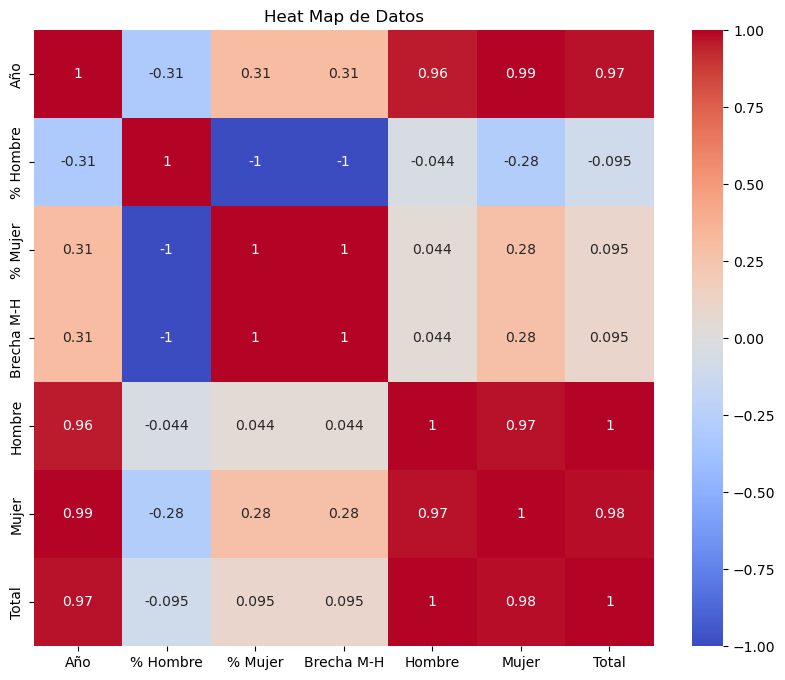

In [446]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(dat.corr(), annot=True, cmap='coolwarm') 

plt.title('Heat Map de Datos')
plt.show()

graficar

In [391]:
dat.drop(index=[17,18], inplace=True)

grafico de matriculacion de caracter stem a los largo de 2007 a 2023

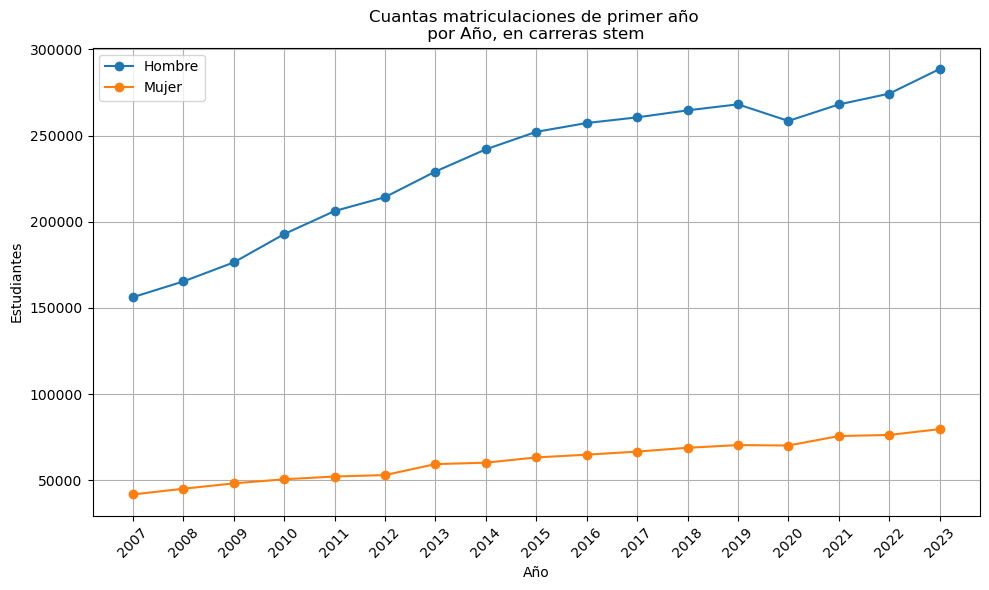

In [462]:

plt.figure(figsize=(10, 6))
plt.plot(dat['Año'], dat["Hombre"], marker='o', label='Hombre')
plt.plot(dat['Año'], dat["Mujer"], marker='o', label="Mujer")


plt.title('Cuantas matriculaciones de primer año \n por Año, en carreras stem ')

plt.xlabel('Año')
plt.ylabel('Estudiantes')
plt.xticks(dat['Año'].astype(int), rotation=45)
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

hay cabron

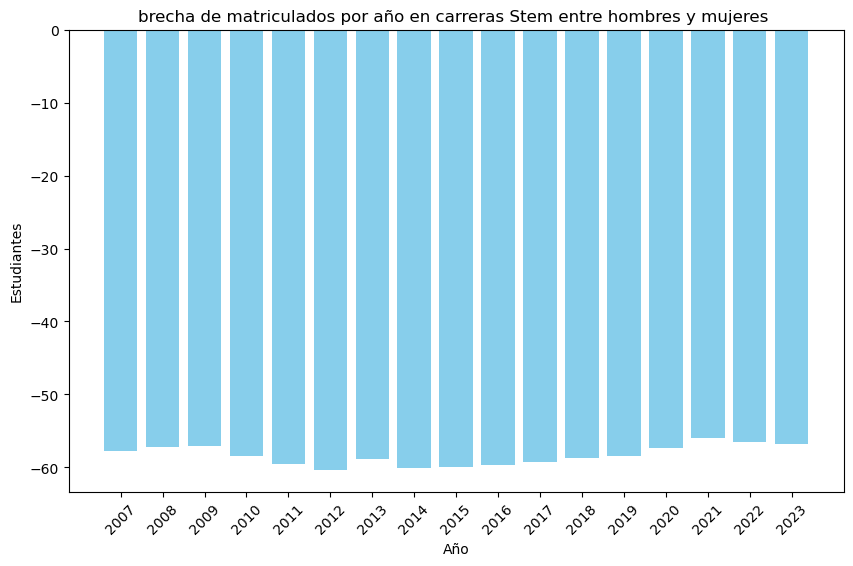

In [460]:

plt.figure(figsize=(10, 6))
plt.bar(dat['Año'], dat['Brecha M-H'], color='skyblue')


plt.title('brecha de matriculados por año en carreras Stem entre hombres y mujeres ')
plt.xticks(dat['Año'].astype(int), rotation=45)
plt.xlabel('Año')
plt.ylabel('Estudiantes')

plt.show()